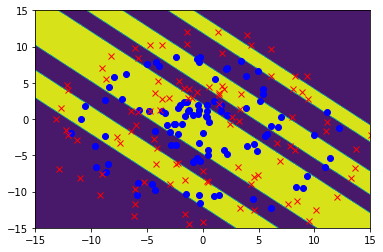

In [19]:
#7.3
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt

n = 200
a = np.matrix(np.linspace(0,4*np.pi,n//2))
u = np.hstack((np.array(a)*np.array(np.cos(a)),np.array(a+np.pi)*np.array(np.cos(a)))).T + np.random.randn(n,1)
v = np.hstack((np.array(a)*np.array(np.sin(a)),np.array(a+np.pi)*np.array(np.sin(a)))).T + np.random.randn(n,1)
x = np.hstack((u,v))
y = np.hstack((np.ones((1,n//2)), -np.ones((1,n//2)))).T


x2 = np.sum(np.power(x,2),axis=1).reshape(n,1)     #对行求和
hh = 2*1*1
l = 0.01
k = np.exp(-(np.tile(x2,(1,n)) + np.tile(x2.T,(n,1)) - 2*x.dot(x.T))/hh)
t = pinv(k.dot(k)+np.eye(n)).dot(k.dot(y))

m = 100
X = np.linspace(-15,15,m).reshape(m,1)
X2 = np.power(X,2)

U = np.exp(-(np.tile(np.power(u,2),(1,m)) + np.tile(X2.T,(n,1)) - 2*u.dot(X.T))/hh)
V = np.exp(-(np.tile(np.power(v,2),(1,m)) + np.tile(X2.T,(n,1)) - 2*u.dot(X.T))/hh)

plt.xlim(-15,15)
plt.ylim(-15,15)


X = X.reshape(n//2)
plt.contourf(X,X,np.sign( V.T.dot(U*np.tile(t,(1,m)))))
plt.plot(x[:,0][(y==1).reshape(n)],x[:,1][(y==1).reshape(n)],'bo')
plt.plot(x[:,0][(y==-1).reshape(n)],x[:,1][(y==-1).reshape(n)],'rx');
#colormap([1 0.7 1; 0.7 1 1]);    #matlab remain